#KNN & PCA | Assignment

Q-1 : What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?

A-1 : K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that predicts the output for a new data point by looking at the ‘k’ closest data points in the training set (based on a distance metric like Euclidean distance).

Classification: The algorithm assigns the class that is most frequent among the k nearest neighbors (majority voting).

Regression: The algorithm predicts the output as the average (or weighted average) of the values of the k nearest neighbors.

Q-2 : What is the Curse of Dimensionality and how does it affect KNN
performance?

A-2 : Curse of Dimensionality refers to the problems that arise when data has too many features (high dimensions). In high dimensions, points become sparse and distances between points become less meaningful, making it hard to find “close” neighbors.

Effect on KNN:

Distance calculations become unreliable.

All points tend to appear equally far apart, reducing classification/regression accuracy.

KNN may require much more data to perform well in high dimensions.

Q-3 : What is Principal Component Analysis (PCA)? How is it different from
feature selection?

A-3 : Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original correlated features into a new set of uncorrelated variables called principal components, ordered by how much variance they capture from the data.

Difference from Feature Selection:

PCA: Creates new features (linear combinations of the original ones) while retaining most of the variance.

Feature Selection: Keeps a subset of the original features without creating new ones.


Q-4 : What are eigenvalues and eigenvectors in PCA, and why are they
important?


Q-4 : In PCA:

Eigenvectors represent the directions (principal components) along which the data varies the most.

Eigenvalues represent the amount of variance captured in each of those directions.

Importance:

Eigenvectors define the new feature axes after transformation.

Eigenvalues tell us how much information (variance) each principal component carries, helping decide how many components to keep.

Q-5 : : How do KNN and PCA complement each other when applied in a single
pipeline?


A-5 : KNN works best in low-dimensional spaces, while PCA reduces high-dimensional data into fewer, most informative dimensions.

When combined in a pipeline:

PCA removes noise and redundant features, making distance measurements in KNN more reliable.

This improves KNN’s accuracy and reduces computation time.

PCA can also help prevent overfitting in KNN by keeping only the most important components.

Q-6 : Dataset:
Use the Wine Dataset from sklearn.datasets.load_wine().
Question 6: Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.
(Include your Python code and output in the code box below.)

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------- Without Scaling --------
knn_no_scale = KNeighborsClassifier(n_neighbors=5)
knn_no_scale.fit(X_train, y_train)
y_pred_no_scale = knn_no_scale.predict(X_test)
accuracy_no_scale = accuracy_score(y_test, y_pred_no_scale)

# -------- With Scaling --------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without Scaling:", accuracy_no_scale)
print("Accuracy with Scaling:", accuracy_scaled)


Accuracy without Scaling: 0.7222222222222222
Accuracy with Scaling: 0.9444444444444444


Q-7 : Question 7: Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.
(Include your Python code and output in the code box below.)

In [2]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of each component:")
print(explained_variance_ratio)


Explained Variance Ratio of each component:
[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]


Q-8 : Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.
(Include your Python code and output in the code box below.)

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------- Original Dataset --------
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)

# -------- PCA with top 2 components --------
pca_2 = PCA(n_components=2)
X_train_pca = pca_2.fit_transform(X_train_scaled)
X_test_pca = pca_2.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy on Original Dataset:", accuracy_original)
print("Accuracy on PCA (2 components):", accuracy_pca)


Accuracy on Original Dataset: 0.9444444444444444
Accuracy on PCA (2 components): 1.0


Q-9 : Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.
(Include your Python code and output in the code box below.)

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------- KNN with Euclidean distance --------
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# -------- KNN with Manhattan distance --------
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Print results
print("Accuracy with Euclidean Distance:", accuracy_euclidean)
print("Accuracy with Manhattan Distance:", accuracy_manhattan)


Accuracy with Euclidean Distance: 0.9444444444444444
Accuracy with Manhattan Distance: 0.9444444444444444


Q-10 : : You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.


Dataset shape: (120, 2000) | #classes: 3
Class distribution: {0: 41, 1: 38, 2: 41}

=== Nested CV Performance (3x outer folds) ===
balanced_accuracy_mean: 0.3767
balanced_accuracy_std: 0.0394
f1_macro_mean: 0.2493
f1_macro_std: 0.0829
roc_auc_ovr_mean: 0.6015
roc_auc_ovr_std: 0.0295

Per-fold details:
   fold                                        best_params  balanced_accuracy  \
0     1  {'knn__n_neighbors': 5, 'knn__weights': 'unifo...           0.410256   
1     2  {'knn__n_neighbors': 7, 'knn__weights': 'unifo...           0.386447   
2     3  {'knn__n_neighbors': 5, 'knn__weights': 'dista...           0.333333   

   f1_macro  roc_auc_ovr  
0  0.303030     0.614757  
1  0.290980     0.567681  
2  0.153846     0.622100  

=== Classification Report (Aggregated Outer-Fold Predictions) ===
              precision    recall  f1-score   support

           0     0.3731    0.6098    0.4630        41
           1     0.3585    0.5000    0.4176        38
           2     0.0000    0.0000 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


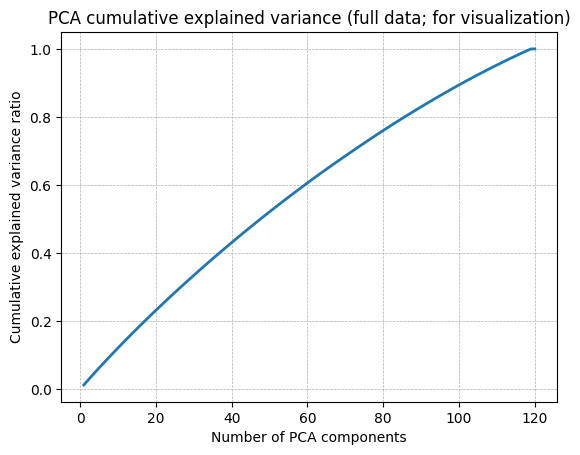

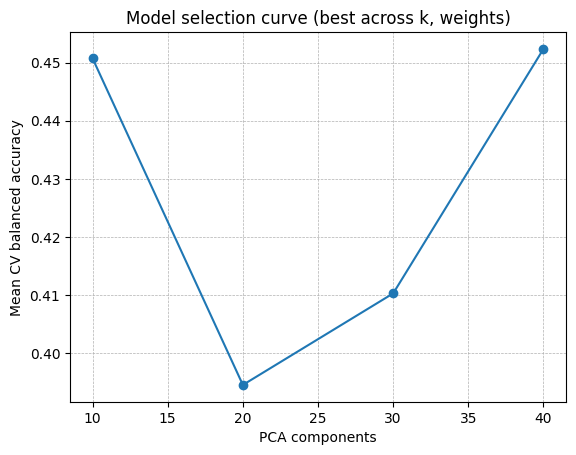


=== Final model selected on full data (from viz CV) ===
Best params: {'knn__n_neighbors': 3, 'knn__weights': 'uniform', 'pca__n_components': 40}


In [7]:
# Rerun with a faster configuration to ensure results within the time limit.

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    balanced_accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
import matplotlib.pyplot as plt


RNG = 7

# 1) Simulate a high-dimensional dataset (still p >> n, but a bit smaller for speed)
X, y = make_classification(
    n_samples=120,
    n_features=2000,
    n_informative=30,
    n_redundant=0,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=1,
    class_sep=2.0,
    flip_y=0.02,
    random_state=RNG
)

print("Dataset shape:", X.shape, "| #classes:", len(np.unique(y)))
class_counts = pd.Series(y).value_counts().sort_index()
print("Class distribution:", class_counts.to_dict())

# 2) Pipeline: Standardize -> PCA -> KNN
pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(svd_solver="full", random_state=RNG)),
    ("knn", KNeighborsClassifier())
])

# 3) Smaller hyperparameter grid for speed
n_components_grid = [10, 20, 30, 40] # Reduced maximum to 40
k_grid = [3, 5, 7]
weights_grid = ["uniform", "distance"]
param_grid = {
    "pca__n_components": n_components_grid,
    "knn__n_neighbors": k_grid,
    "knn__weights": weights_grid,
}

# 4) Nested CV (3x outer, 2x inner) for unbiased estimate
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RNG)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=RNG)

outer_results = []
y_true_all = []
y_pred_all = []

for fold_idx, (tr_idx, te_idx) in enumerate(outer_cv.split(X, y), start=1):
    X_tr, X_te = X[tr_idx], X[te_idx]
    y_tr, y_te = y[tr_idx], y[te_idx]

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring={"bal_acc": "balanced_accuracy", "f1_macro": "f1_macro"},
        refit="bal_acc",
        cv=inner_cv,
        n_jobs=None,
        verbose=0
    )
    gs.fit(X_tr, y_tr)

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_te)

    fold_bal_acc = balanced_accuracy_score(y_te, y_pred)
    fold_f1_macro = f1_score(y_te, y_pred, average="macro")

    try:
        y_proba = best_model.predict_proba(X_te)
        fold_roc_auc_ovr = roc_auc_score(y_te, y_proba, multi_class="ovr")
    except Exception:
        fold_roc_auc_ovr = np.nan

    outer_results.append({
        "fold": fold_idx,
        "best_params": gs.best_params_,
        "balanced_accuracy": fold_bal_acc,
        "f1_macro": fold_f1_macro,
        "roc_auc_ovr": fold_roc_auc_ovr
    })

    y_true_all.append(y_te)
    y_pred_all.append(y_pred)

y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)

results_df = pd.DataFrame(outer_results)
summary = {
    "balanced_accuracy_mean": results_df["balanced_accuracy"].mean(),
    "balanced_accuracy_std": results_df["balanced_accuracy"].std(ddof=1),
    "f1_macro_mean": results_df["f1_macro"].mean(),
    "f1_macro_std": results_df["f1_macro"].std(ddof=1),
    "roc_auc_ovr_mean": results_df["roc_auc_ovr"].mean(skipna=True),
    "roc_auc_ovr_std": results_df["roc_auc_ovr"].std(ddof=1, skipna=True),
}
print("\n=== Nested CV Performance (3x outer folds) ===")
for k, v in summary.items():
    print(f"{k}: {v:.4f}" if isinstance(v, float) and not np.isnan(v) else f"{k}: {v}")

print("\nPer-fold details:")
print(results_df)

print("\n=== Classification Report (Aggregated Outer-Fold Predictions) ===")
print(classification_report(y_true_all, y_pred_all, digits=4))
print("Confusion Matrix (rows = true, cols = predicted):")
print(confusion_matrix(y_true_all, y_pred_all))

# 5) PCA cumulative explained variance (visualization only; selection is via CV)
scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X)
pca_full = PCA(svd_solver="full", random_state=RNG)
pca_full.fit(X_scaled_full)
cum_explained = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(np.arange(1, len(cum_explained) + 1), cum_explained, linewidth=2)
plt.xlabel("Number of PCA components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("PCA cumulative explained variance (full data; for visualization)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# 6) Simple model selection curve: mean CV balanced accuracy vs #components
viz_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RNG)
gs_viz = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="balanced_accuracy",
    cv=viz_cv,
    refit=True,
    verbose=0,
)
gs_viz.fit(X, y)

records = []
for n_comp in n_components_grid:
    mask = [d["pca__n_components"] == n_comp for d in gs_viz.cv_results_["params"]]
    scores = np.array(gs_viz.cv_results_["mean_test_score"])[mask]
    if scores.size > 0:
        records.append({"n_components": n_comp, "mean_bal_acc": float(np.max(scores))})
viz_df = pd.DataFrame(records).sort_values("n_components")

plt.figure()
plt.plot(viz_df["n_components"], viz_df["mean_bal_acc"], marker="o")
plt.xlabel("PCA components")
plt.ylabel("Mean CV balanced accuracy")
plt.title("Model selection curve (best across k, weights)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

print("\n=== Final model selected on full data (from viz CV) ===")
print("Best params:", gs_viz.best_params_)